In [4]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

EDA tasks
- import dataset and observe summary statistics
- identify categorical numerical columns
- observe distribution of continuous numerical columns
- observe value counts of categorical numerical columns
- observe correlations between numerical variables and target var
- observe covariance between categorical variables and target var

In [3]:
# import dataset
mushrooms = pd.read_csv('..\data\mushroom_cleaned.csv')
mushrooms.head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Corey\AppData\Local\Temp\ipykernel_20044\3827636362.py:2: SyntaxWarning: invalid escape sequence '\d'
  mushrooms = pd.read_csv('..\data\mushroom_cleaned.csv')


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [17]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [18]:
mushrooms.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


We can see that the dataset is complete with non-null values. It may be worth checking for outliers in the numerical variables.
Numerical variables:
- cap-diameter
- stem-height
- stem-width

first let's change the columns to camel case, the current format isn't nice.

In [19]:
for item in mushrooms.columns:
    mushrooms = mushrooms.rename(columns = {item: item.replace('-', '_')})
mushrooms.columns

Index(['cap_diameter', 'cap_shape', 'gill_attachment', 'gill_color',
       'stem_height', 'stem_width', 'stem_color', 'season', 'class'],
      dtype='object')

Let's look at the distribution of our three numerical cols, we can see:
- all are right-skewed with a greater mean than median
- none of these distributions are particularly normal
- cap diameter and stem width are slightly multimodal
- log transforms turn the distribution left-skewed, unsurprising as the distributions weren't really normal to begin with


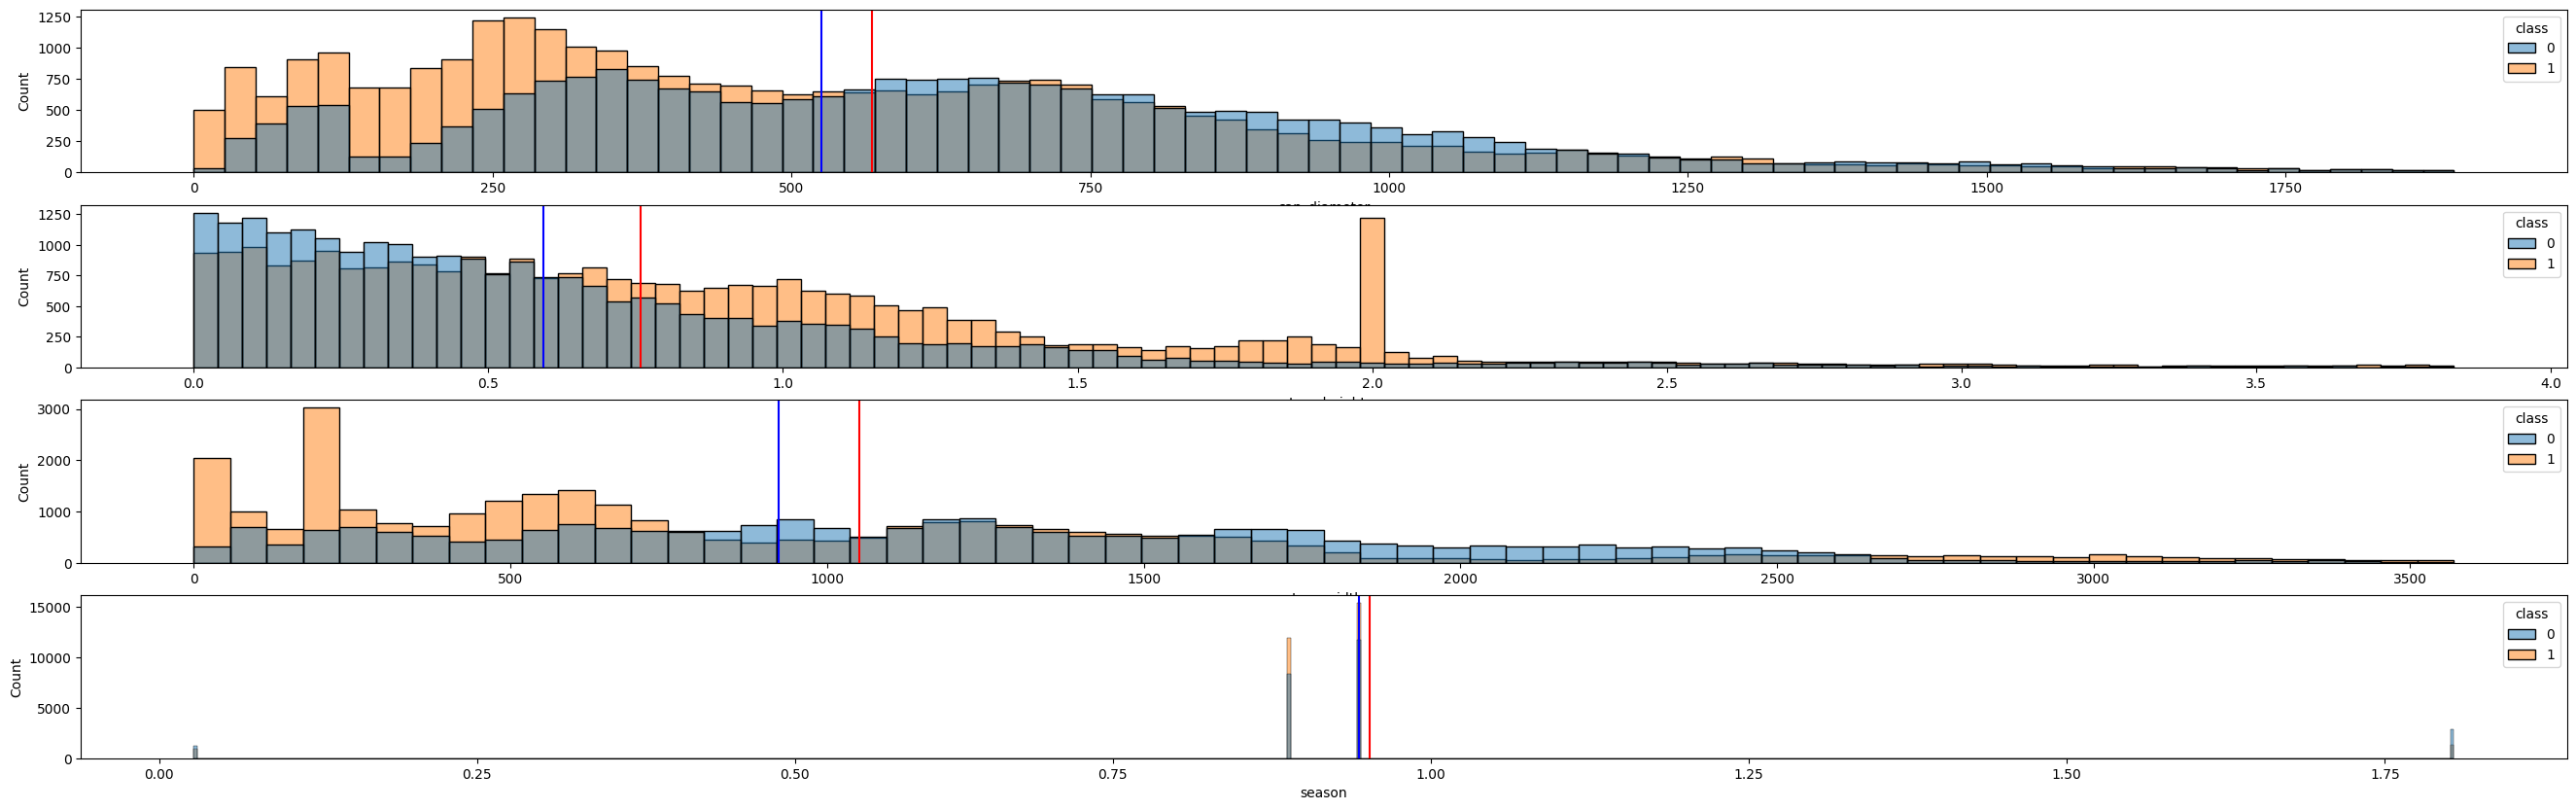

In [20]:
numerical_cols = ['cap_diameter', 'stem_height', 'stem_width', 'season']
fig, ax = plt.subplots(len(numerical_cols), figsize = [33, 10])
for idx in range(len(numerical_cols)):
    col_mean = mushrooms[numerical_cols[idx]].mean()
    col_med = mushrooms[numerical_cols[idx]].median()
    _ = sns.histplot(data = mushrooms, x = numerical_cols[idx], ax = ax[idx], hue = 'class')
    ax[idx].axvline(col_mean, color = 'red')
    ax[idx].axvline(col_med, color = 'blue')

c:\Users\Corey\personal_code\mushroom_decision_tree\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Corey\personal_code\mushroom_decision_tree\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


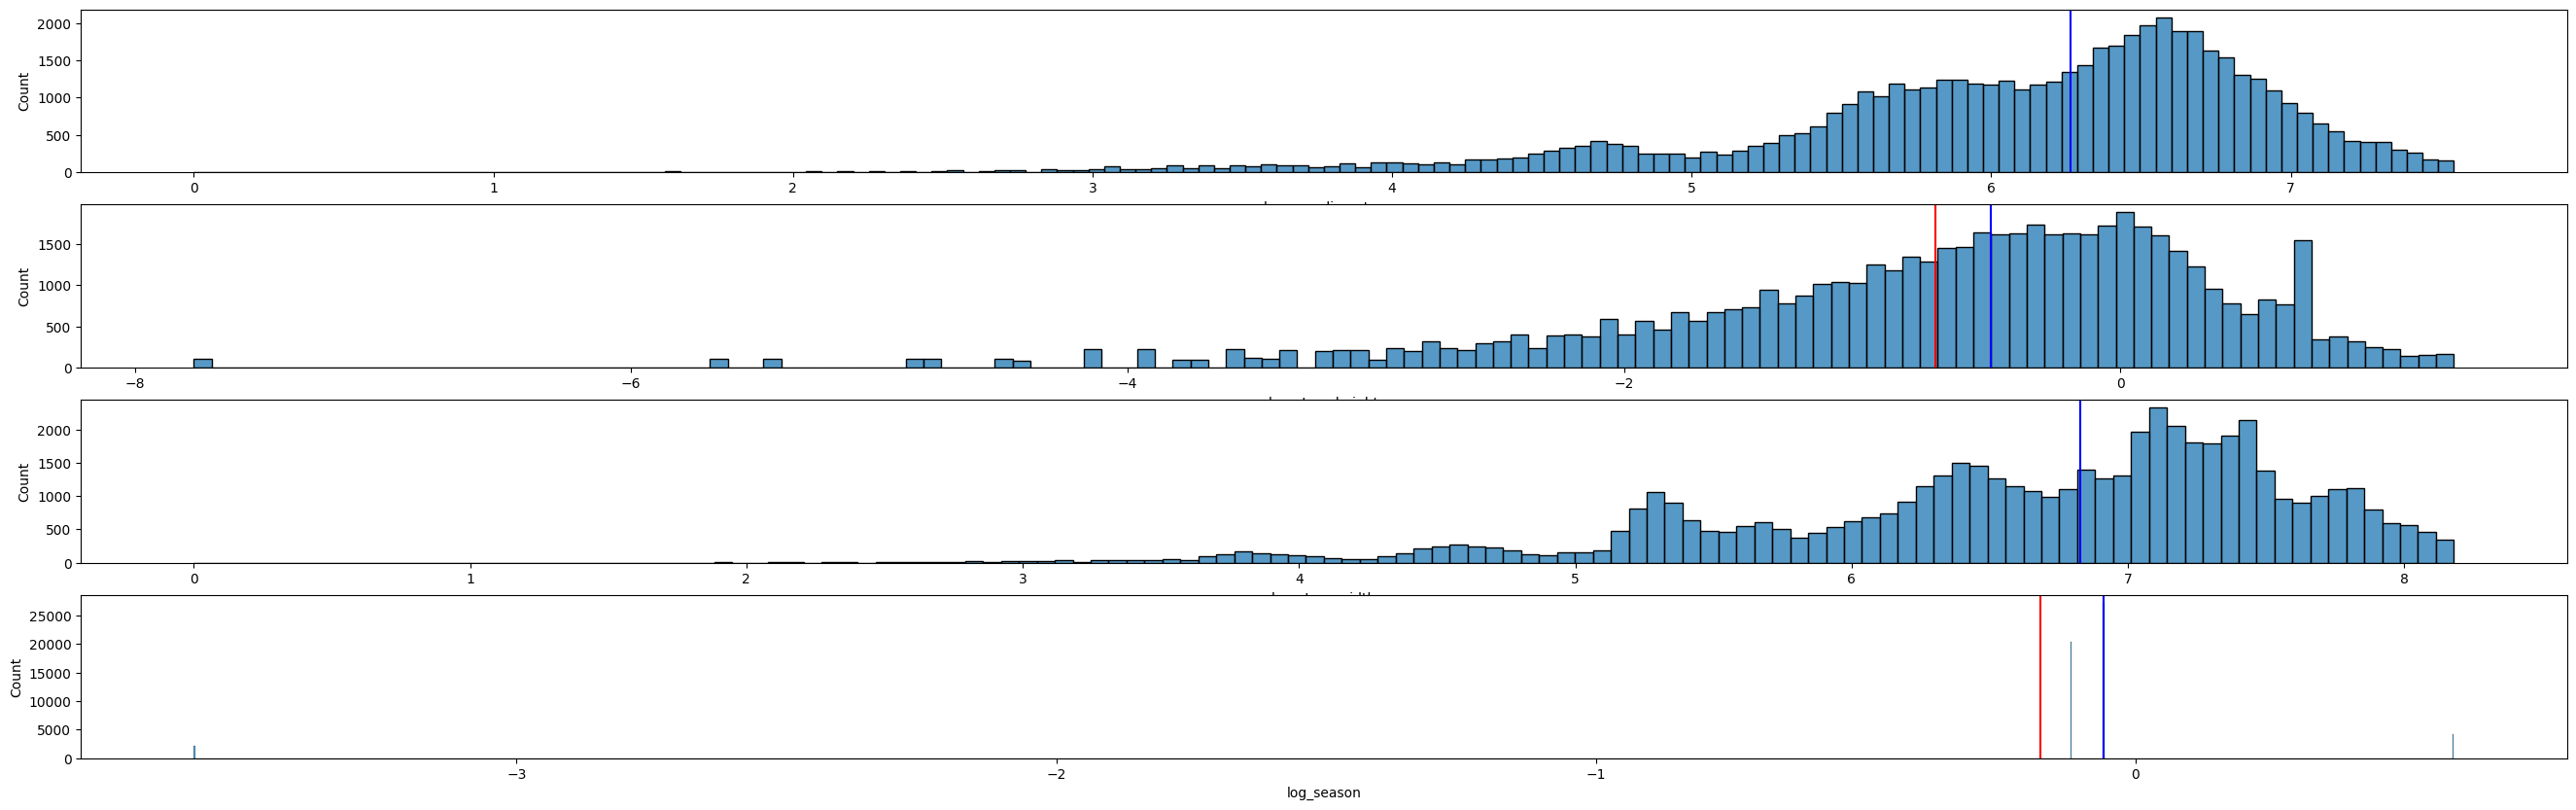

In [21]:
numerical_cols = ['cap_diameter', 'stem_height', 'stem_width', 'season']
fig, ax = plt.subplots(len(numerical_cols), figsize = [33, 10])
for idx in range(len(numerical_cols)):
    mushrooms[f'log_{numerical_cols[idx]}'] = np.log(mushrooms[numerical_cols[idx]].astype(float))
    col_mean = mushrooms[f'log_{numerical_cols[idx]}'].mean()
    col_med = mushrooms[f'log_{numerical_cols[idx]}'].median()
    _ = sns.histplot(data = mushrooms, x = f'log_{numerical_cols[idx]}', ax = ax[idx])
    ax[idx].axvline(col_mean, color = 'red')
    ax[idx].axvline(col_med, color = 'blue')

In [22]:
print(len(mushrooms['season'].unique()))

4


As it turns out there are only four distinct values for season, even though it is continuous numerical. We can reformat these into numerical categories.
next we should look at correlations between our class variable and our numerical cols, from what we can see:
- It is clear that there isn't much correlation between our variables and class. Perhaps there may be some feature engineering we can do to create interaction variables.
    - stem volume (3.14 * (stem_width/2)**2 * stem_height)
    - cap area (3.14 * (cap_diameter/2) **2 * stem_height)

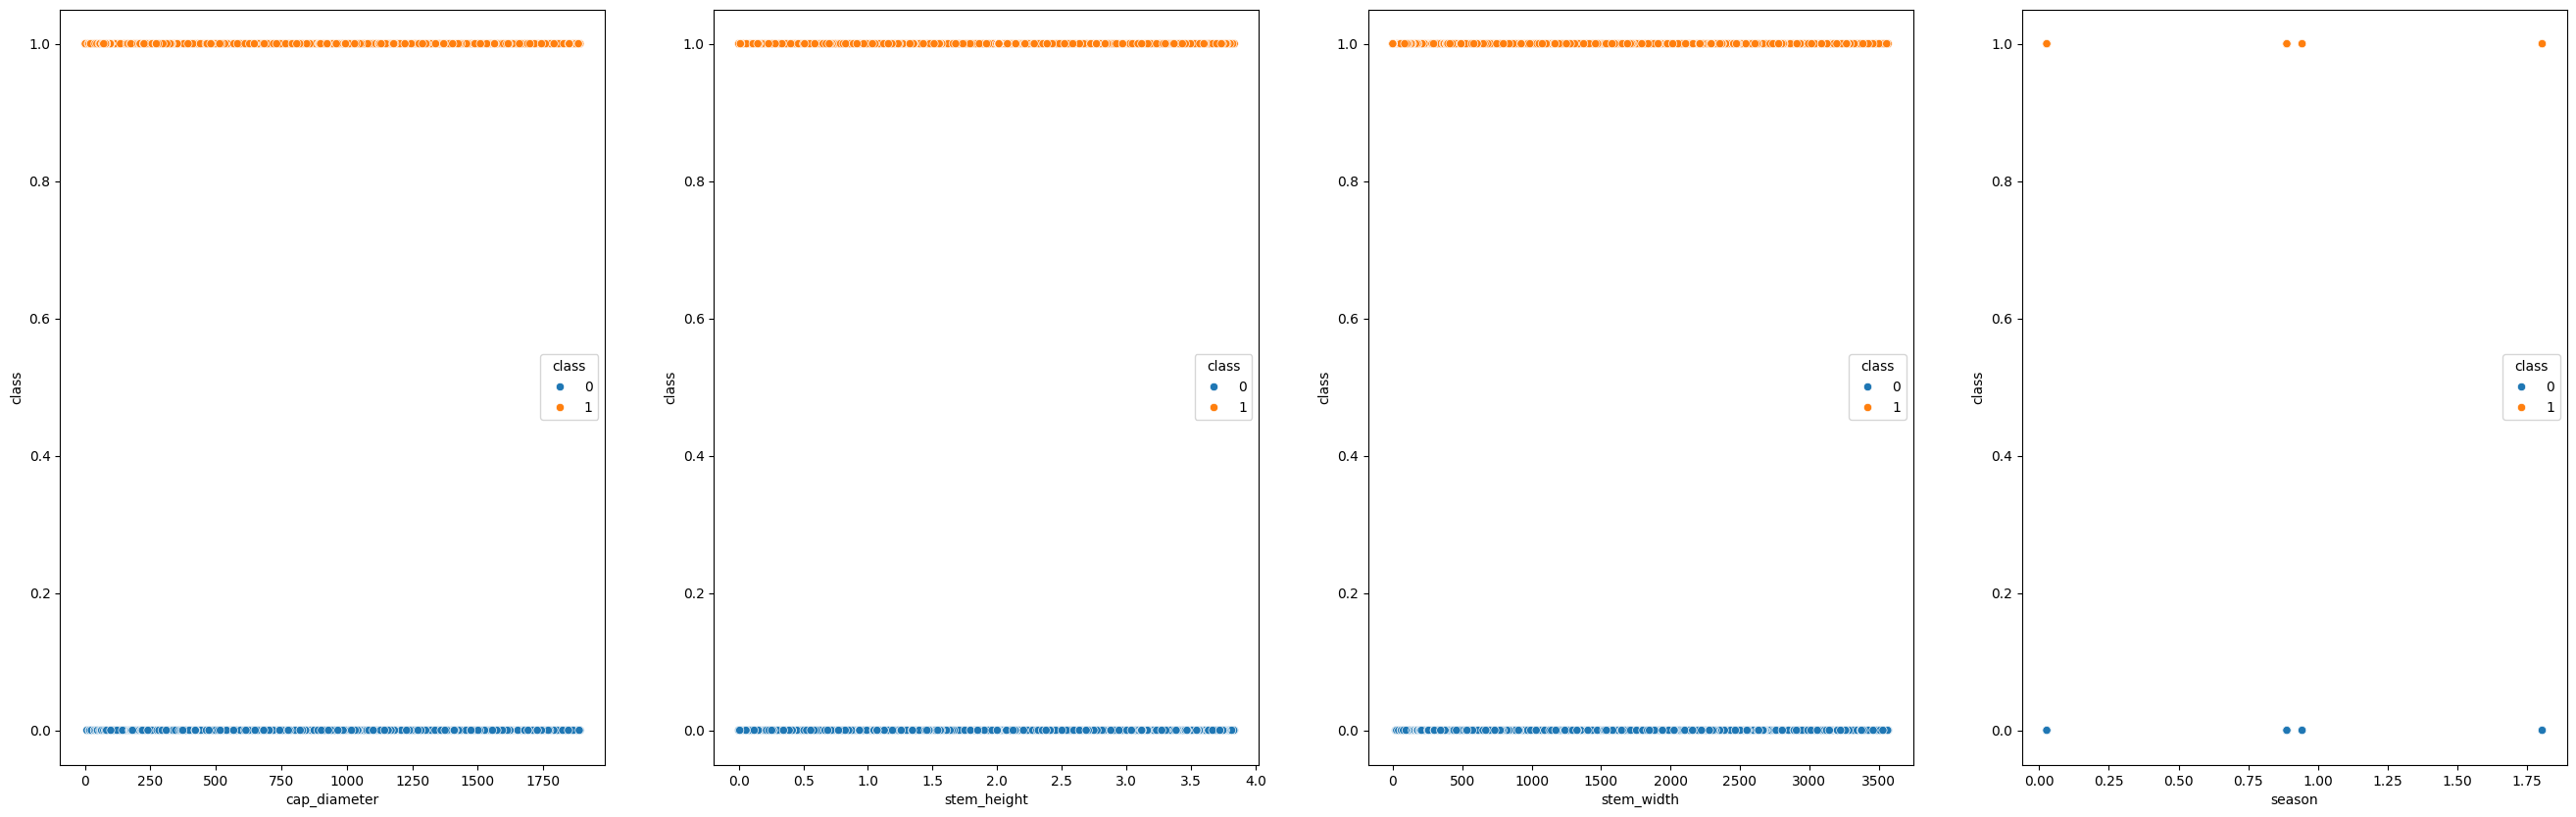

In [23]:
fig, ax = plt.subplots(ncols = len(numerical_cols), figsize = [33, 10])
for idx in range(len(numerical_cols)):
    _ = sns.scatterplot(data = mushrooms, x = numerical_cols[idx], y = 'class', ax = ax[idx], hue = 'class')


In [24]:
mushrooms['stem_volume'] = (3.14 * ((mushrooms['stem_width'] / 2) ** 2) * mushrooms['stem_height'])
mushrooms['cap_area'] = 3.14 * ((mushrooms['stem_width'] / 2) ** 2)

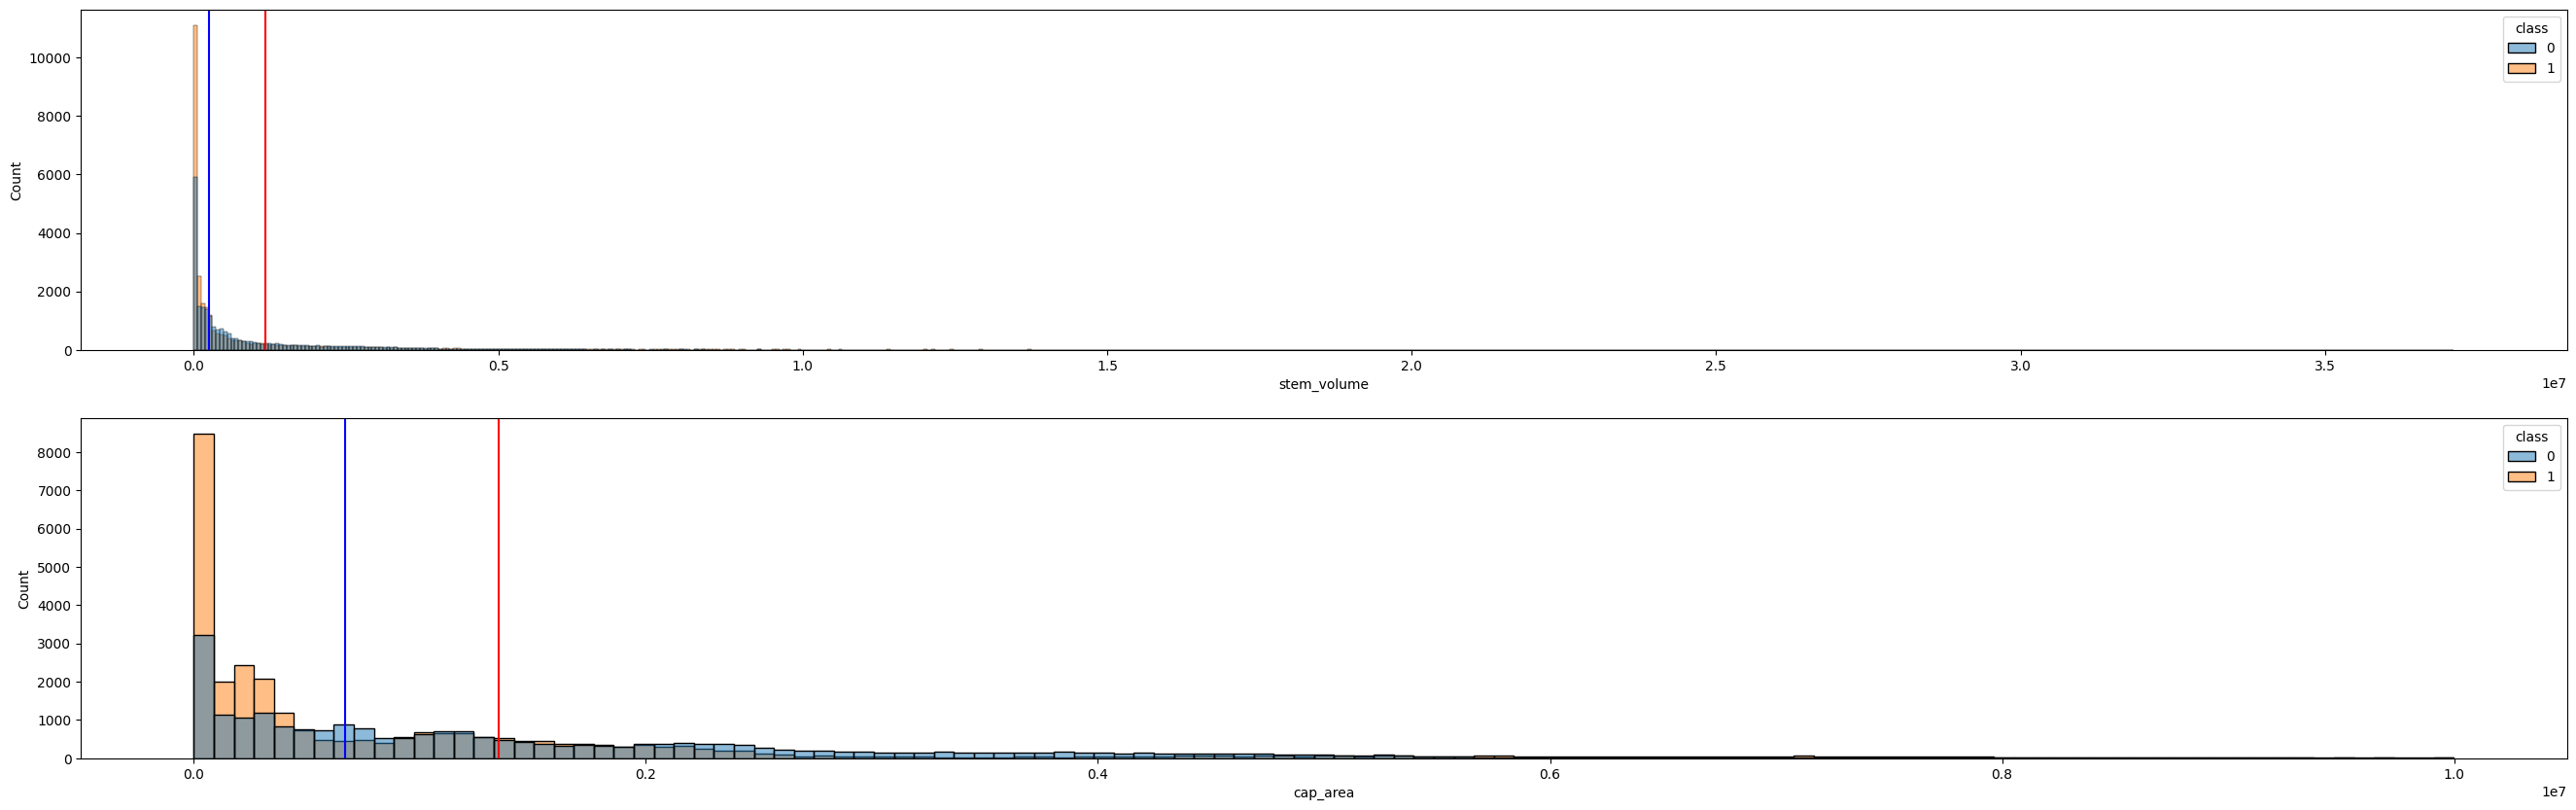

In [25]:
numerical_cols = ['stem_volume', 'cap_area']
fig, ax = plt.subplots(nrows = len(numerical_cols), figsize = [33, 10])
for idx in range(len(numerical_cols)):
    col_mean = mushrooms[numerical_cols[idx]].mean()
    col_med = mushrooms[numerical_cols[idx]].median()
    _ = sns.histplot(data = mushrooms, x = numerical_cols[idx], ax = ax[idx], hue = 'class')
    ax[idx].axvline(col_mean, color = 'red')
    ax[idx].axvline(col_med, color = 'blue')

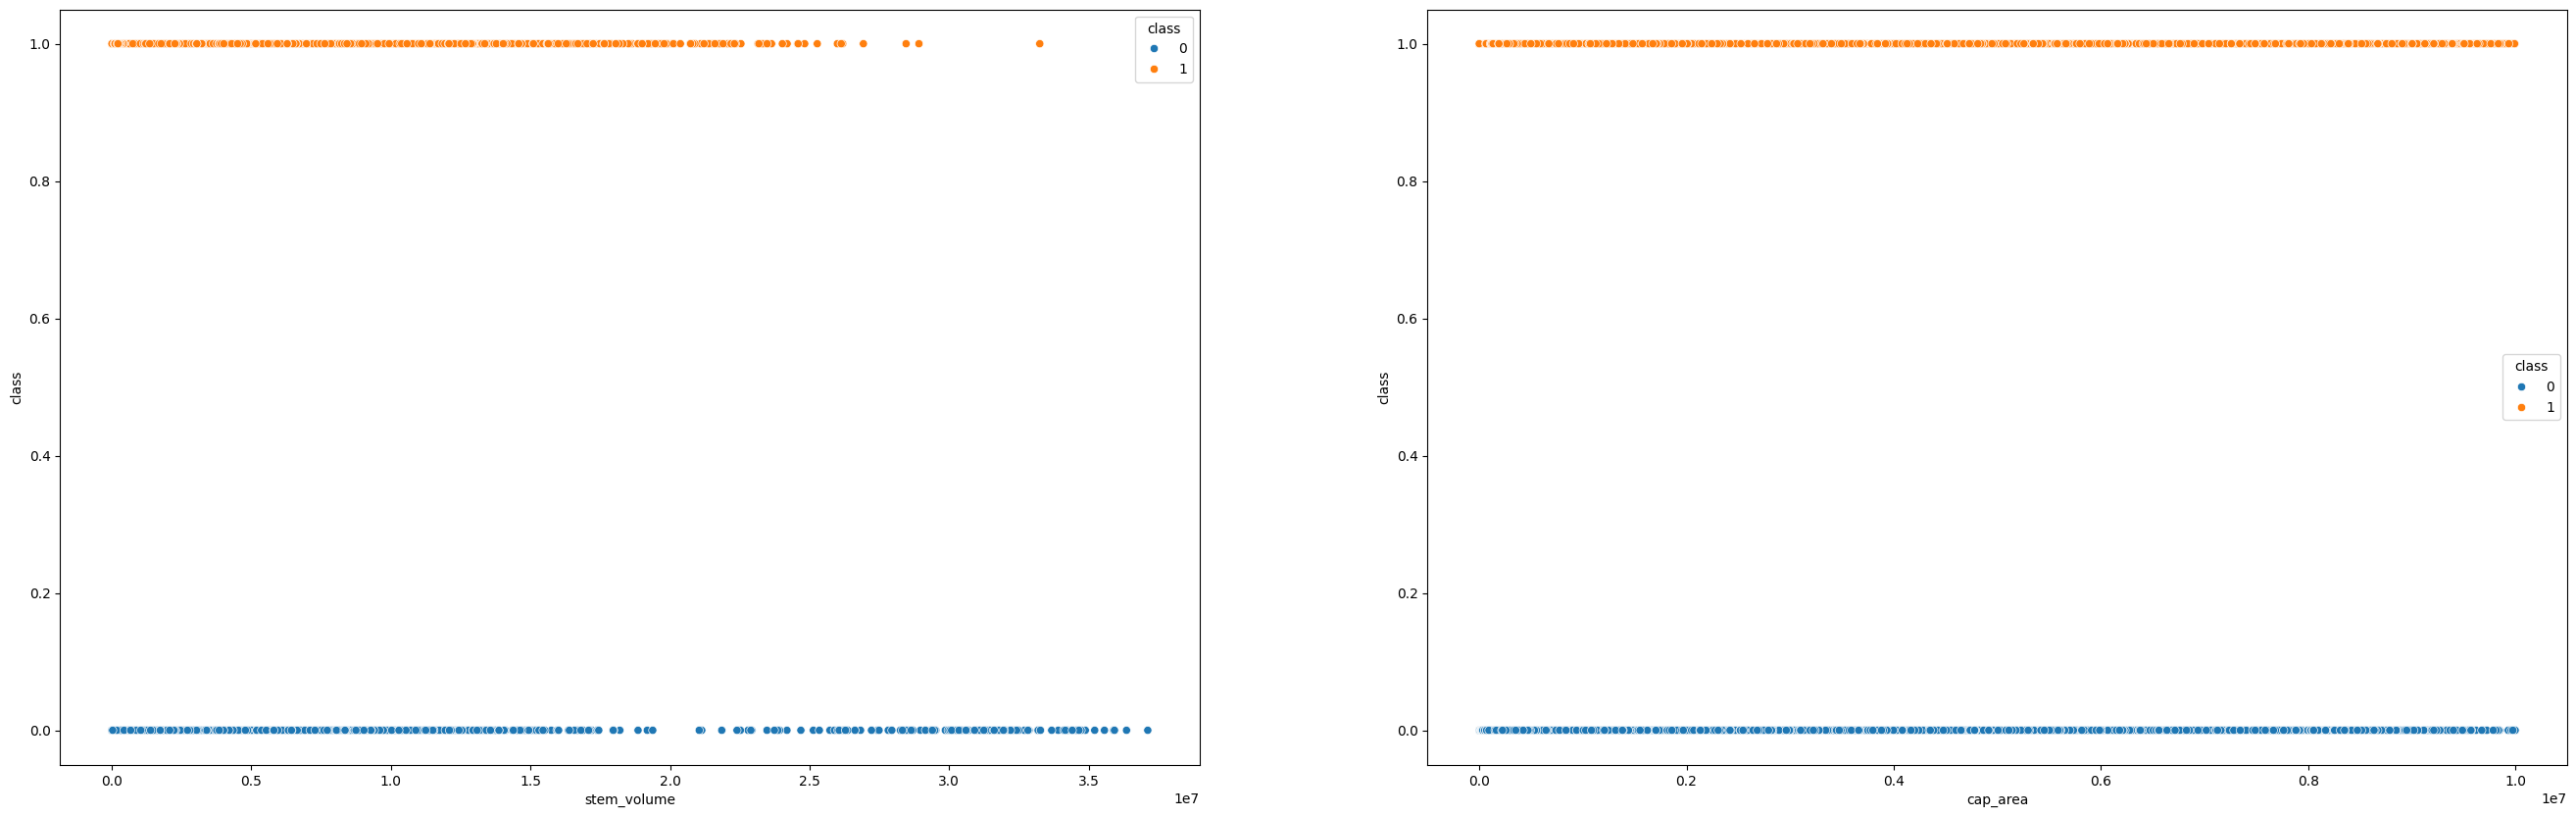

In [26]:
fig, ax = plt.subplots(ncols = 2, figsize = [33, 10])
for idx in range(len(numerical_cols)):
    _ = sns.scatterplot(data = mushrooms, x = numerical_cols[idx], y = 'class', ax = ax[idx], hue = 'class')

It is clear that even with the variables sigmoid transformed, there is no relationship, so logistic regression is out of the window.

In [27]:
def sigmoid(x):
    sigmoid = 1/(1 + np.exp(-x))
    return sigmoid

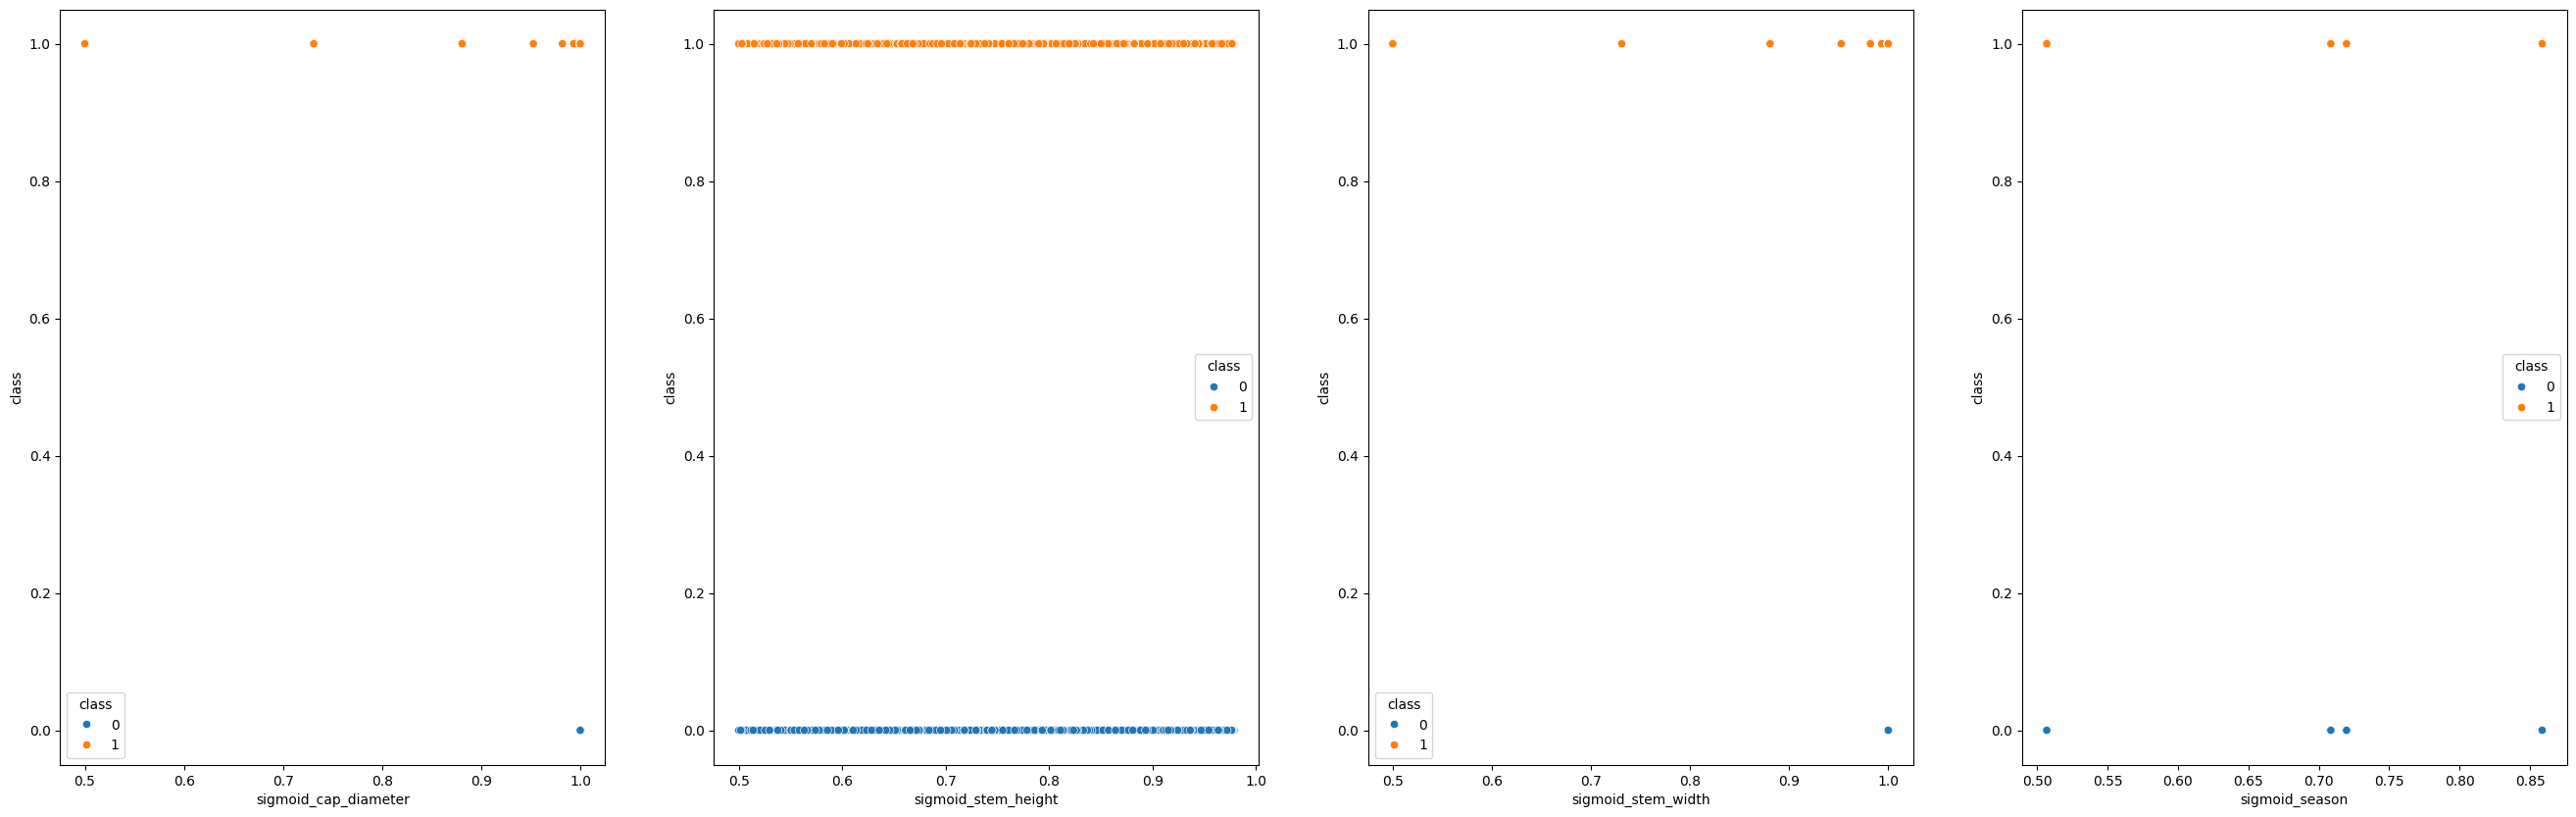

In [28]:
numerical_cols = ['cap_diameter', 'stem_height', 'stem_width', 'season']
fig, ax = plt.subplots(ncols = len(numerical_cols), figsize = [33, 10])
for idx in range(len(numerical_cols)):
    mushrooms[f'sigmoid_{numerical_cols[idx]}'] = mushrooms[numerical_cols[idx]].apply(lambda x: sigmoid(x))
    _ = sns.scatterplot(data = mushrooms, x = f'sigmoid_{numerical_cols[idx]}', y = 'class', ax = ax[idx], hue = 'class')

Categorical analysis:
- convert cat variables and enforce categories
- observe value counts and visualize
- observe potential covariance

In [29]:
numerical_cols = ['cap_diameter', 'stem_height', 'stem_width'] + ['stem_volume', 'cap_area'] + ['log_cap_diameter', 'log_stem_height', 'log_stem_width', 'log_season', 'sigmoid_cap_diameter', 'sigmoid_stem_height', 'sigmoid_stem_width', 'sigmoid_stem_volume', 'sigmoid_season']
cat_cols = []
for col in mushrooms.columns:
    if col not in numerical_cols and col != 'class':
        mushrooms[col] = mushrooms[col].astype('category')
        cat_cols.append(col)
print(cat_cols)

['cap_shape', 'gill_attachment', 'gill_color', 'stem_color', 'season']


The value_counts of each of our categories is not evenly sampled, this may not matter too much but it's worth observing the value_counts grouped by class. There's not too many categories to one-hot encode either.

In [30]:
for col in cat_cols:
    print(mushrooms[col].value_counts())

cap_shape
6    23377
2    12294
5     6889
0     5273
3     2780
1     1722
4     1700
Name: count, dtype: int64
gill_attachment
0    19405
1    10026
6     7001
5     5292
4     4795
2     4474
3     3042
Name: count, dtype: int64
gill_color
10    16531
11     8214
5      8154
7      5455
3      3847
2      3042
6      2714
4      1772
8      1271
1      1059
9      1023
0       953
Name: count, dtype: int64
stem_color
11    20317
6     15316
12     7017
3      2626
1      1918
7      1848
10     1393
2      1059
8      1025
4       576
9       541
5       226
0       173
Name: count, dtype: int64
season
0.943195    27210
0.888450    20387
1.804273     4219
0.027372     2219
Name: count, dtype: int64


In [31]:
for col in cat_cols:
    print(len(mushrooms[col].unique()))

7
7
12
13
4


From the heatmaps below, we can see which mushrooms are toxic based on combinations of the categorical variables. It could be that there are categories we can extract from our continuous variables to supplement this. It's looking more like a decision tree problem for modelling.

C:\Users\Corey\AppData\Local\Temp\ipykernel_23328\2190167226.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mushrooms_pivot = pd.pivot_table(data=mushrooms, values = 'class', index = cat_cols[idx1] , columns = cat_cols[idx2])
C:\Users\Corey\AppData\Local\Temp\ipykernel_23328\2190167226.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mushrooms_pivot = pd.pivot_table(data=mushrooms, values = 'class', index = cat_cols[idx1] , columns = cat_cols[idx2])
C:\Users\Corey\AppData\Local\Temp\ipykernel_23328\2190167226.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observ

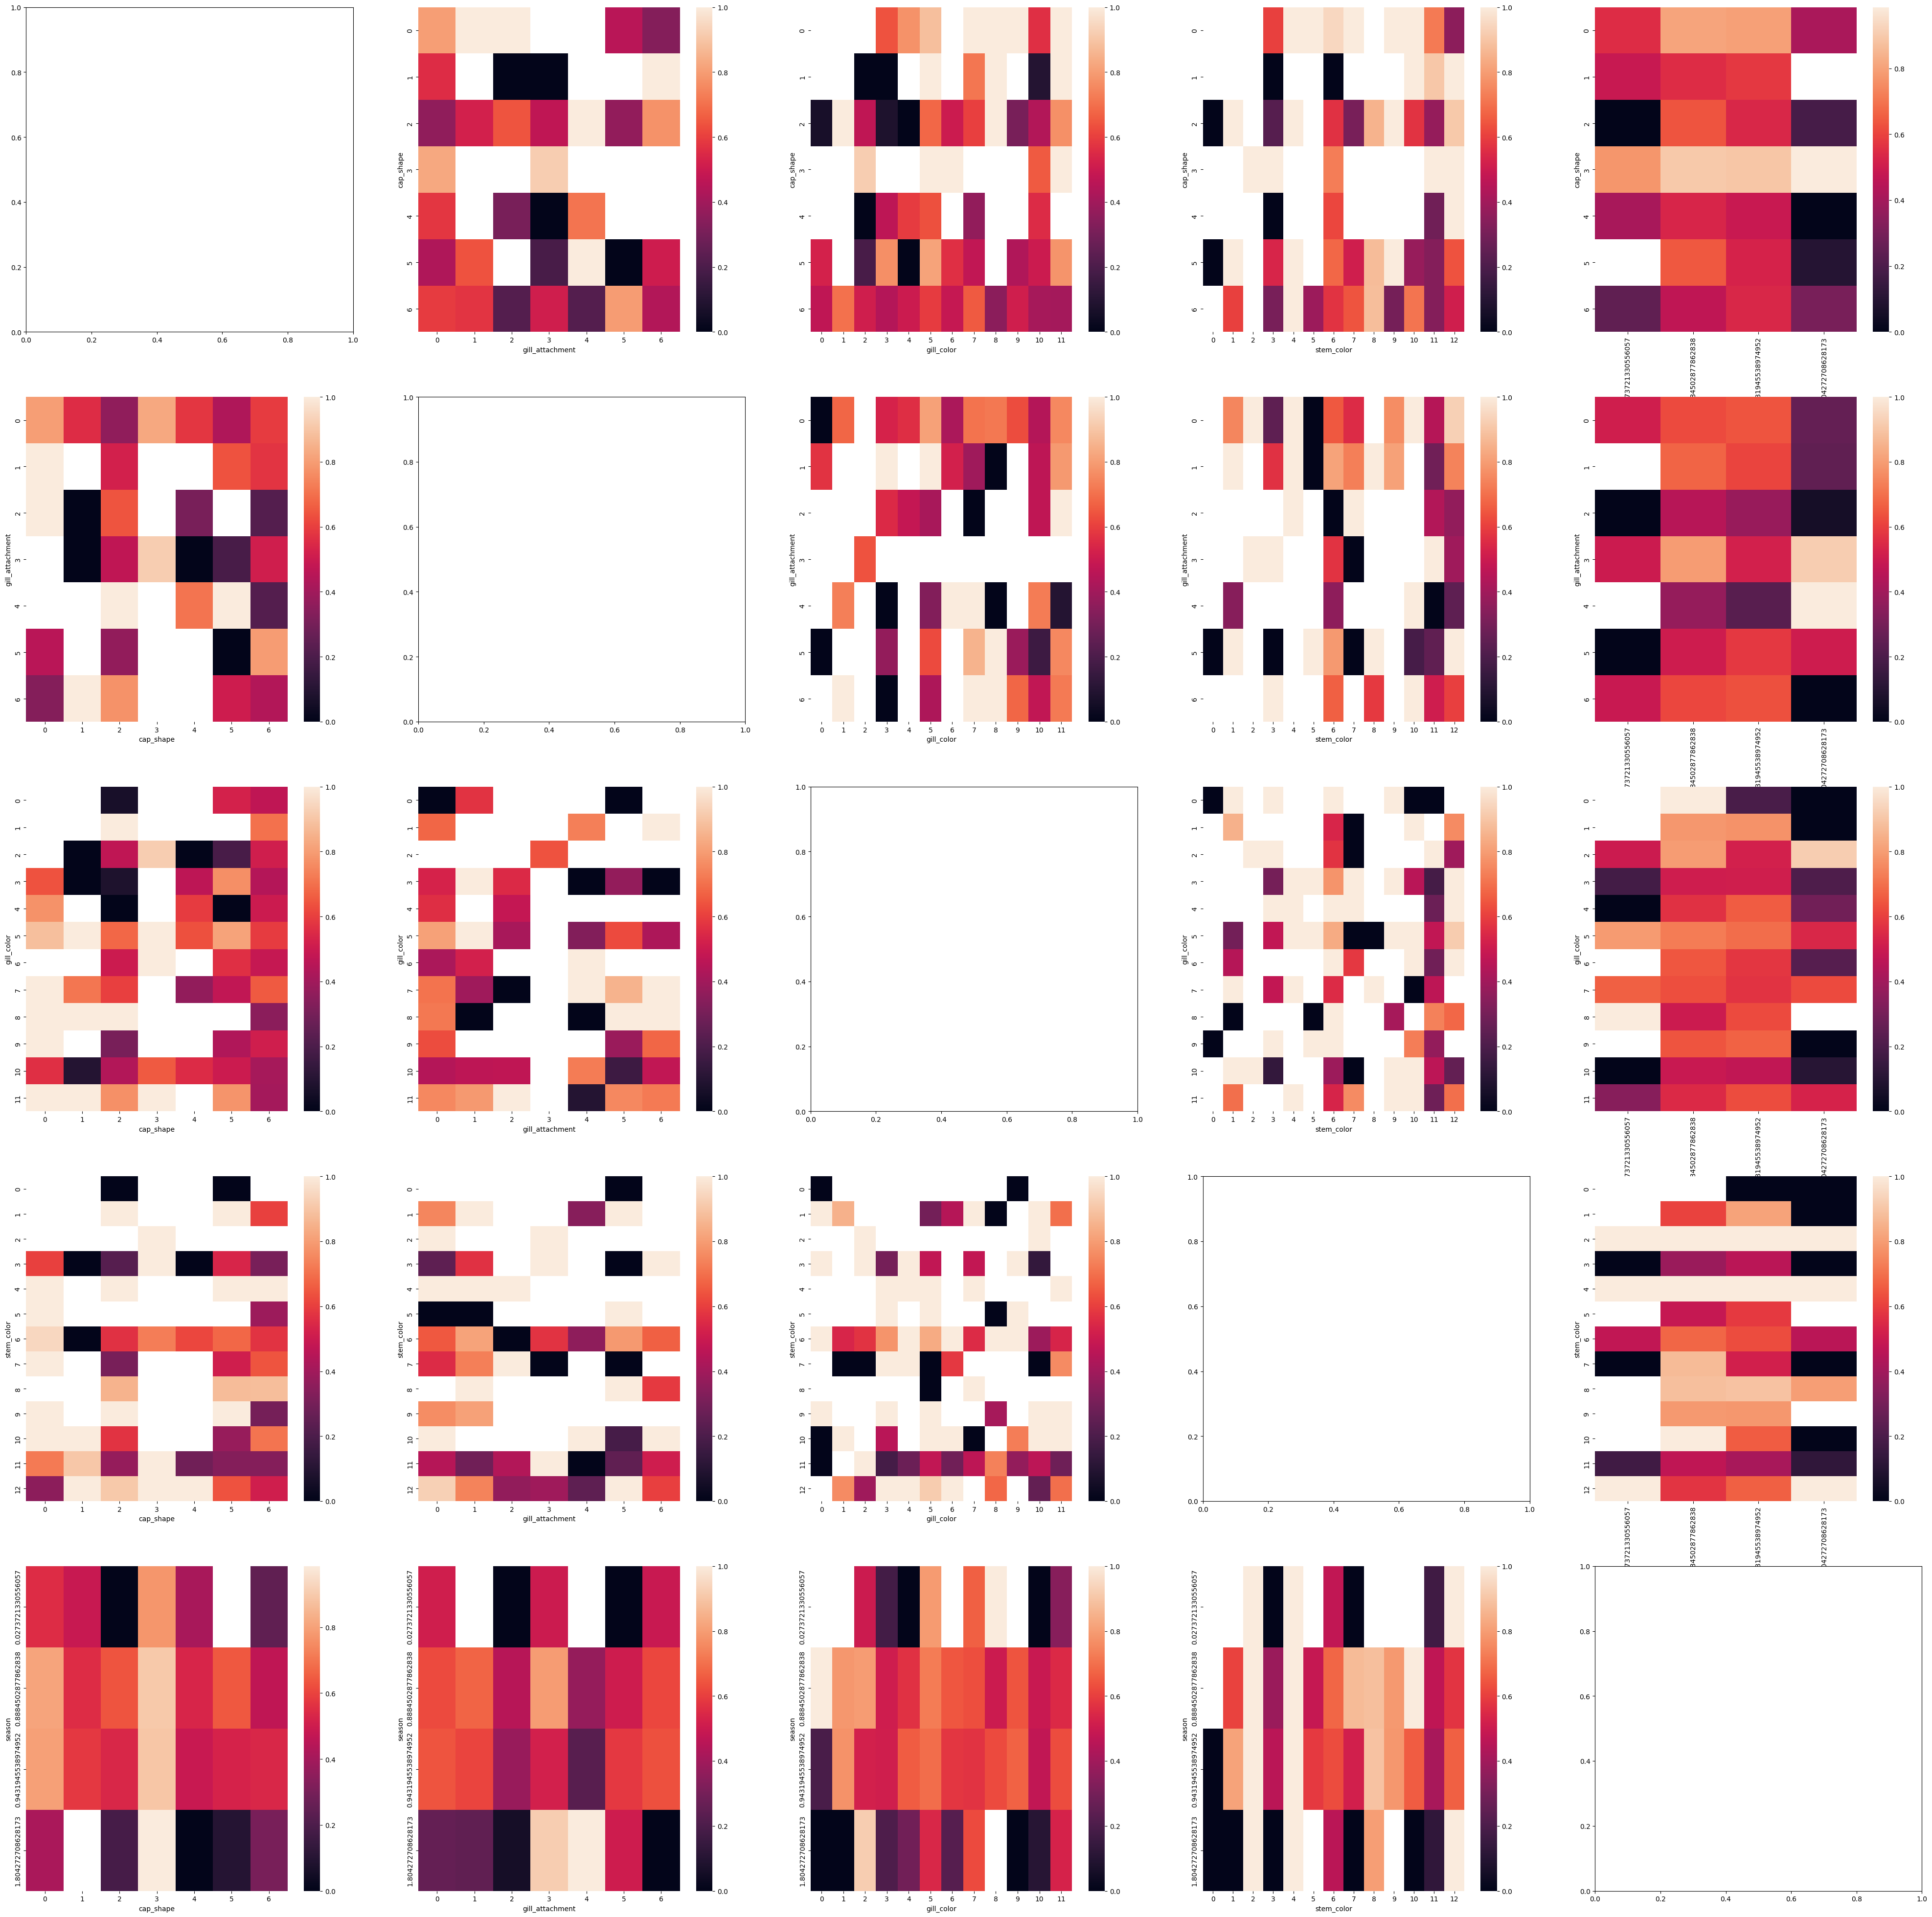

In [32]:
fig, ax = plt.subplots(nrows = len(cat_cols), ncols = len(cat_cols), figsize = [50, 50])
for idx1 in range(len(cat_cols)):
    for idx2 in range(len(cat_cols)):
        if idx1 != idx2:
            mushrooms_pivot = pd.pivot_table(data=mushrooms, values = 'class', index = cat_cols[idx1] , columns = cat_cols[idx2])
            _ = sns.heatmap(mushrooms_pivot, ax = ax[idx1][idx2])